### IMPORT THE LIBRARIES 

In [12]:
from PIL import Image, ImageFilter
from skimage.feature import greycomatrix
import numpy as np
from matplotlib import pyplot as plt
import cv2 as c
import math
from plantcv import plantcv

### For low intensity image

### OPEN THE IMAGE 

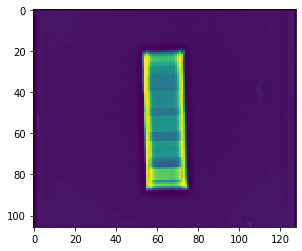

In [53]:
low_image = Image.open("X-Rays/70_40.bmp")
plt.imshow(low_image)

### FIND THE WIDTH AND HEIGHT OF THE IMAGE

In [4]:
width, height = low_image.size
print(width,height)

128 106


### CROP THE REGION OF INTEREST FROM THE IMAGE

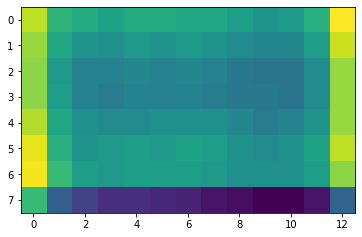

In [5]:
# left = 47
# top = 88.8
# right = 58
# bottom = 94
# low_cropped_img = low_image.crop((left,top,right,bottom))
# low_cropped_img.show()
# plt.imshow(low_cropped_img)

left = 58
top = 65
right = 71
bottom = 73
low_cropped_img = low_image.crop((left,top,right,bottom))
low_cropped_img.show()
plt.imshow(low_cropped_img)

### UNIQUE VALUES FROM AN ARRAY

In [6]:
np.unique(low_cropped_img)

array([ 89,  91,  92,  94,  95,  96,  99, 105, 106, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 132,
       133, 135, 136, 137, 139, 140, 141], dtype=uint8)

### AVERAGE PIXEL INTENSITY

In [7]:
low_avg_pixel_intensity = np.mean(low_cropped_img)
print(low_avg_pixel_intensity)

115.96153846153847


### For High intensity image

### OPEN THE IMAGE 

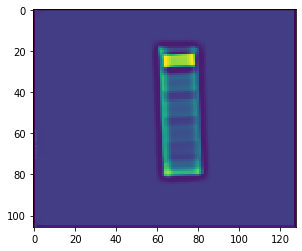

In [8]:
high_image = Image.open("X-Rays/111_120.bmp")
plt.imshow(high_image)

### FIND THE WIDTH AND HEIGHT OF THE IMAGE

In [9]:
width, height = high_image.size
print(width,height)

128 106


### CROP THE REGION OF INTEREST FROM THE IMAGE

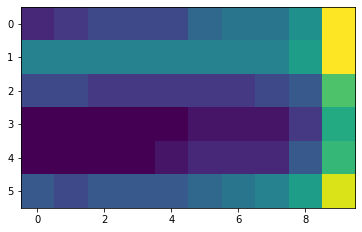

In [10]:
# left = 65
# top = 23
# right = 75
# bottom = 27
# high_cropped_img = high_image.crop((left,top,right,bottom))
# high_cropped_img.show()
# plt.imshow(high_cropped_img)

left = 67
top = 32
right = 77
bottom = 38
high_cropped_img = high_image.crop((left,top,right,bottom))
high_cropped_img.show()
plt.imshow(high_cropped_img)

### UNIQUE VALUES FROM AN ARRAY

In [669]:
np.unique(high_cropped_img)

array([68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 85, 86],
      dtype=uint8)

### AVERAGE PIXEL INTENSITY

In [670]:
high_avg_pixel_intensity = np.mean(high_cropped_img)
print(high_avg_pixel_intensity)

73.23333333333333


### Find K Value for Low Intensity

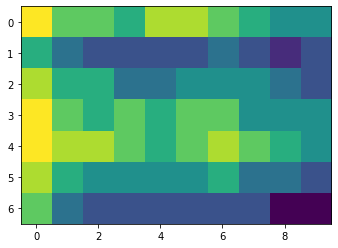

In [671]:
left = 58
top = 32
right = 68
bottom = 39
low_cropped_img = low_image.crop((left,top,right,bottom))
low_cropped_img.show()
plt.imshow(low_cropped_img)

In [672]:
k_low_avg_pixel_intensity = np.mean(low_cropped_img)
print(k_low_avg_pixel_intensity)

91.27142857142857


### Find K Value for High Intensity

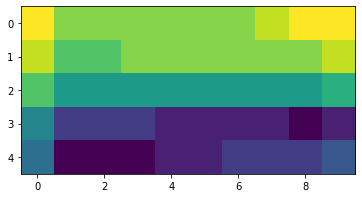

In [673]:
left = 67
top = 68
right = 77
bottom = 73
high_cropped_img = high_image.crop((left,top,right,bottom))
high_cropped_img.show()
plt.imshow(high_cropped_img)

In [674]:
k_high_avg_pixel_intensity = np.mean(high_cropped_img)
print(k_high_avg_pixel_intensity)

51.62


In [695]:
K = math.log(k_low_avg_pixel_intensity)/math.log(k_high_avg_pixel_intensity)
K

1.1445085513346993

In [696]:
mu_b_low = 0.2689

In [697]:
mu_b_high = 0.1761

In [698]:
low_avg_pixel_intensity

115.96153846153847

In [ ]:
high_avg_pixel_intensity

In [700]:
math.log(low_avg_pixel_intensity)

4.753258571139804

In [701]:
(K * math.log(high_avg_pixel_intensity))

4.914119931975987

In [702]:
math.log(high_avg_pixel_intensity)

4.293650690722455

In [703]:
print(math.log(low_avg_pixel_intensity))
print(K * math.log(high_avg_pixel_intensity))
Numerator = (math.log(low_avg_pixel_intensity)) - (K * math.log(high_avg_pixel_intensity)) 
print(Numerator)

4.753258571139804
4.914119931975987
-0.16086136083618374


In [704]:
Denominator = mu_b_low - (K * mu_b_high)
print(Denominator)

0.06735204410995943


In [686]:
M_b = Numerator/Denominator

In [687]:
print(M_b)

-2.3883664254281625


In [688]:
k_some = 0.1749/0.165

k_some = 0.1823/0.165

In [689]:
k_some

1.06

In [690]:
Numerator = (math.log(low_avg_pixel_intensity)) - (k_some * math.log(high_avg_pixel_intensity))
print(Numerator)

0.20198883897400144


In [691]:
Denominator = mu_b_low - (k_some * mu_b_high)
print(Denominator)

0.08223399999999995


In [692]:
M_b = Numerator/Denominator

In [693]:
M_b

2.4562691705863946

In [694]:
0.02568454545454546 * 1.003

0.025761599090909092

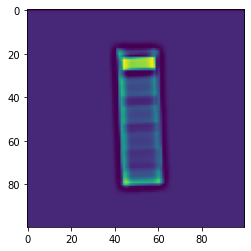

In [57]:
imageref = Image.open("X-Rays/111_120.bmp").convert('L')
left = 20
top = 0
right = 120
bottom = 100
imga = np.array(imageref.crop((left,top,right,bottom)))
plt.imshow(imga)


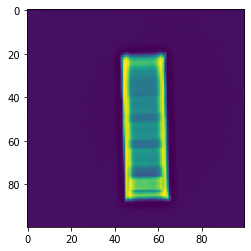

In [71]:
imageref1 = Image.open("X-Rays/70_40.bmp").convert('L')
left = 10
top = 0
right = 110
bottom = 100
imgb = np.array(imageref1.crop((left,top,right,bottom)))
plt.imshow(imgb)

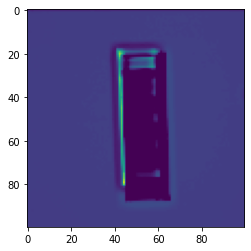

In [75]:
Z = plantcv.image_subtract(imga,imgb)
plt.imshow(Z)
i = Image.fromarray(Z)
i.show()